# MNIST Digits Classification Using PCA and EM Algorithm

## Introduction
In this notebook, I'll perform hand-written digits classification on [MNIST dataset](http://yann.lecun.com/exdb/mnist/), a dataset of hand written digits in a $28 \times 28$ pixels that make up each picture a 724 dimensional vector (or a vector with 724 features). Since the dimensionality of this dataset is so high, we need to perform Principal Component Analysis (PCA) on this dataset to reduce its demensionality. After that we can apply Gaussian Mixture Model (GMM) to classify images to digits.

## Table of Content
* [Loading the Dataset](#first)
* [Performing Built-in PCA on the Dataset](#second)
* [Applying GMM and EM Algorithm to Dimension-Reduced Dataset](#third)
* [Conclusion](#fourth)

## Load the Dataset <a class="anchor" id="first"></a>

In [1]:
import gzip, pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gmmlib

In [2]:
# load dataset as a numpy array
with gzip.open('data/mnist.pkl.gz', 'rb') as f:
    f = pickle._Unpickler(f)
    f.encoding = 'latin1'
    trainSet, validSet, testSet = f.load()
    mnist_data = np.concatenate((trainSet[0], validSet[0], testSet[0]), axis=0)

In [3]:
# display images
def showImageSamples(imageset, n, shape=[28,28], col=3, width=16, dispopt='gray', random=True):
    row    = np.ceil(n / col)
    height = np.around(row * (width / col))
    plt.figure(figsize=(width, height))
    subplotIndex = 100 * row + 10 * col + 1
    for i in range(n):
        if random:
            img = imageset[np.random.randint(len(imageset), size=1)]
        else:
            img = imageset[i]
        plt.subplot(subplotIndex + i)
        plt.imshow(img.reshape(shape), cmap=dispopt)

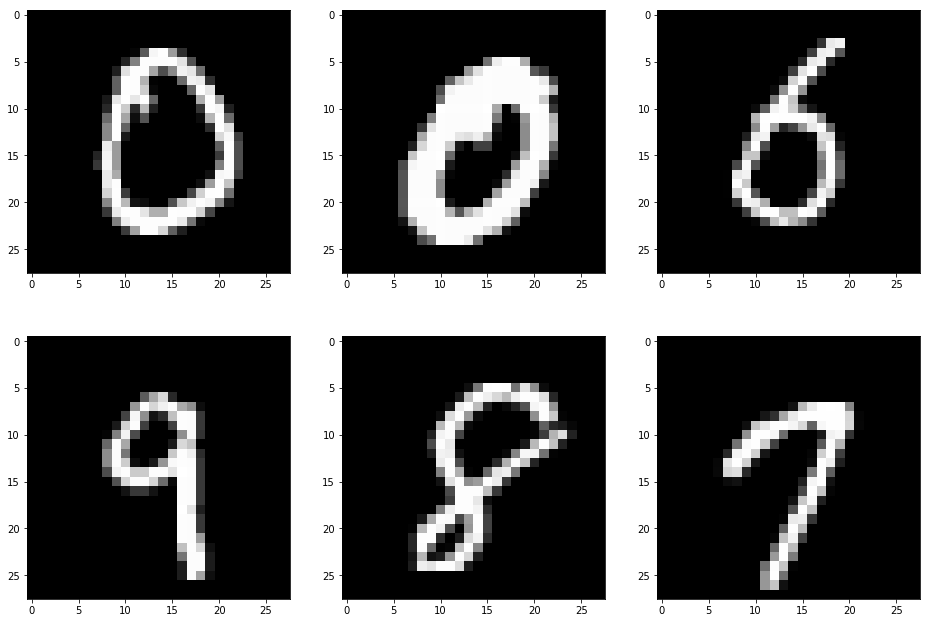

In [4]:
showImageSamples(mnist_data, 6)

## Performing Built-in PCA on the Dataset <a class="anchor" id="second"></a>
We will use the PCA function provided by scikit-learn. It allows us to reduce the dimenality to any positive integer that is less than the original number of components, and we can access the eigen vector and eigen value of that transformation.

In [5]:
def doPCA(dataset, n):
    from sklearn.decomposition import PCA
    pca = PCA(n_components=n)
    trans_pca = pca.fit_transform(dataset)
    eigen_vec = pca.components_
    eigen_val = pca.explained_variance_
    
    return trans_pca, eigen_vec, eigen_val

In [6]:
mnist_2d, eigen_vec, eigen_val = doPCA(mnist_data, 2)

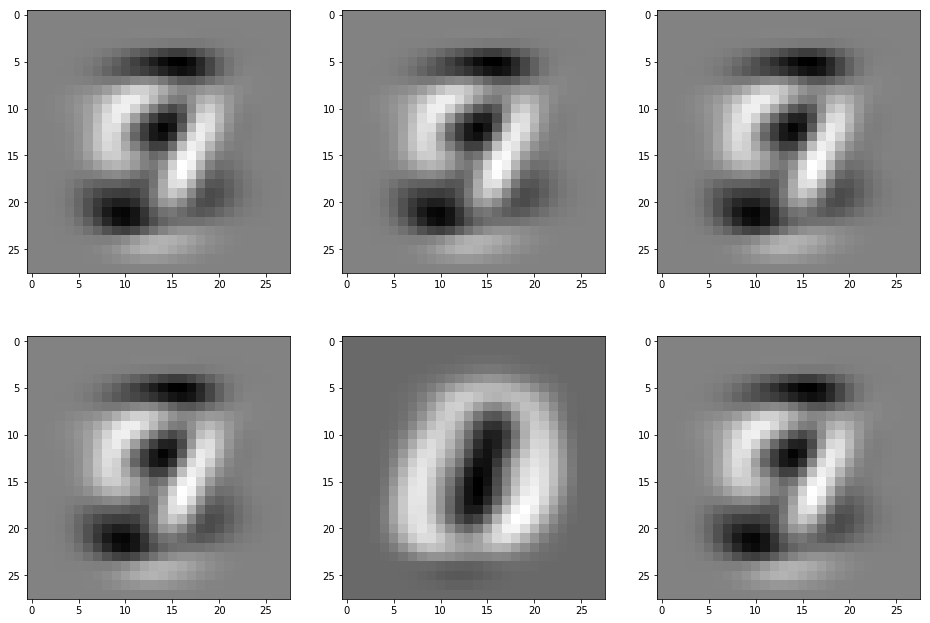

In [7]:
showImageSamples(eigen_vec, 6)

## Applying GMM and EM Algorithm to Dimension-Reduced Dataset <a class="anchor" id="third"></a>
Since now we have successfully reduced the number of components in the dataset to 2 for each vector, we can use the functions I created in Part 1 to classify each datapoint's corresponding cluster.

In [8]:
ndata = 1000
# randomly pick a subset of data
data = mnist_2d[np.random.randint(len(mnist_2d), size=ndata)]

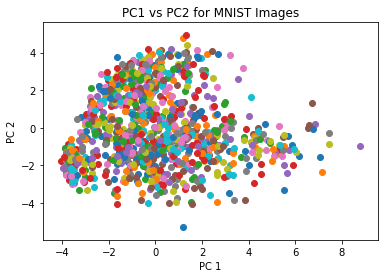

In [9]:
# Plot each of the data points
for x, y in zip(data[:, 0], data[:, 1]):
    # Marker and color represents actual number
    plt.scatter(x, y)
    
plt.xlabel('PC 1'); plt.ylabel('PC 2');
plt.title('PC1 vs PC2 for MNIST Images');

In [10]:
# initialize parameters, intentionally bad so it can improve over time
init_means, init_covs, init_weights = gmmlib.random_init(data, 10)

# run EM algorithm
final_gmm, ll_trace = gmmlib.EM_algo(data, init_means, init_covs, init_weights)
final_gmm

[{'mean': array([ 0.3478425, -0.8093397], dtype=float32),
  'covariance': array([[1.28757826, 0.27620909],
         [0.27620909, 1.18184481]]),
  'weight': 0.08829475851333189},
 {'mean': array([ 1.1672585, -1.3828149], dtype=float32),
  'covariance': array([[ 1.63954382, -0.32823977],
         [-0.32823977,  1.94915155]]),
  'weight': 0.1057336307609444},
 {'mean': array([ 2.8413134 , -0.58138835], dtype=float32),
  'covariance': array([[ 3.81904669, -0.58855849],
         [-0.58855849,  0.46494338]]),
  'weight': 0.09639321937461914},
 {'mean': array([ 3.999043 , -1.2774762], dtype=float32),
  'covariance': array([[3.78427104, 0.67694092],
         [0.67694092, 1.17241534]]),
  'weight': 0.05792882204637177},
 {'mean': array([-0.4235243, -2.2149389], dtype=float32),
  'covariance': array([[ 0.88157588, -0.17361604],
         [-0.17361604,  0.7813547 ]]),
  'weight': 0.07319737969970792},
 {'mean': array([0.80342734, 0.8091388 ], dtype=float32),
  'covariance': array([[1.51142568, 0.9

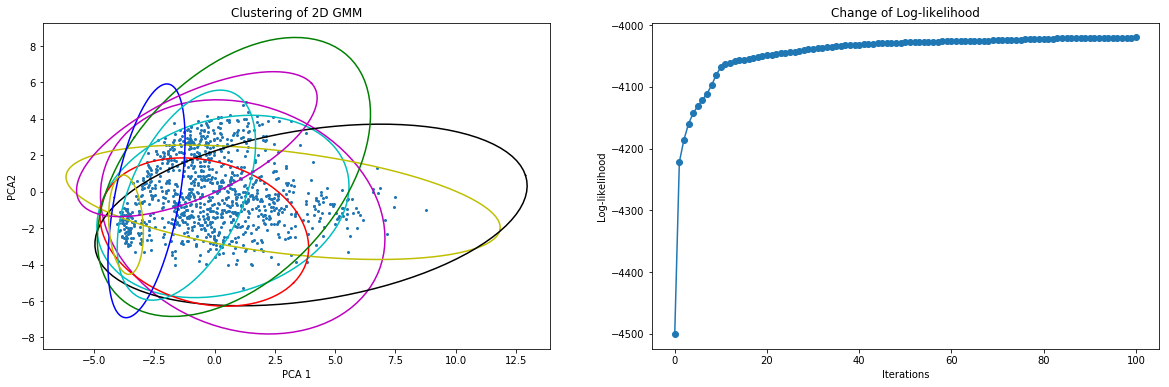

In [12]:
gmmlib.doubleplot(data, final_gmm, ll_trace, [20, 6])

## Conclusion <a class="anchor" id="fourth"></a>
Admittedly, we can see that our visualization tools isn't powerful enough to show us how accurate our model is. Since the MNIST dataset was different from Part 1, where all the clusters are very distinctly distributed, all the datapoints seem to be all congregated together and thus all the ellipses are grouping together. Nevertheless, we can also observe that the log likelihood is steadily leveling off as the number of iterations approaches the limit, indicating there's not much space left for improvement. So the clustering should be successful to a certain extent.